# Assignment 1

Показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется O(1/m + L/p). Подробнее в материалах лекции.
Построить графики зависимости FPR от длинны строк L и простого модуля p.
Эксперименты провести для L = np.linspace(10, 100, 11) и 10 простых чисел p из интервала (100, 1000)
Для каждой точки выполнить 10 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.


In [103]:
import numpy as np
from math import log, e, sqrt
import random
from bitarray import bitarray
from tqdm import tqdm_notebook
from collections import Counter
import matplotlib.pyplot as plt

Функции

In [68]:
def double_hash(y, p):
        
    def hash_int(x, p, a=112, b=22):
        return (a*x + b) % p
        
    def poly_hash(s, p, x=31):
        h = 0
        for j in range(len(s)-1, -1, -1):
            h = (h * x + ord(s[j]) + p) % p
        return h

    return hash_int(poly_hash(y, p), p)

def rand_str(L):
    return ''.join(random.choice('abcdefghijklmnopqrstuvwxyz')
                   for _ in range(int(L)))

In [65]:
def if_hash_ex(hashes):
    
    N = 0
    hc = Counter(hashes)
    
    for i in hc:
        if hc[i] > 1:
            N += hc[i] // 2

    return N

In [41]:
def primes():
    primes = []
    for possiblePrime in range(100, 1000):

        isPrime = True
        for num in range(2, possiblePrime):
            if possiblePrime % num == 0:
                isPrime = False
                break
      
        if isPrime:
            primes.append(possiblePrime)
        
    return random.sample(primes, 10)

Фикрисуем рандомное значение L

In [284]:
L = np.linspace(10, 100, 11)
ps = primes()

In [351]:
l = random.choice(L)
arr = [rand_str(l) for _ in range(100000)]
all_ = {}
n = 0

res = []

for p in ps:
    
    res = []
    
    for i in range(10):
        
        ar = arr[n: n+1000]
        hashes = [double_hash(item, p) for item in ar]
        n_c = if_hash_ex(hashes)
        fpr = n_c * 2 / (1000 *  (1000 - 1))
        res.append(fpr)
        n += 1000

    all_[p] = (np.std(res), np.mean(res))

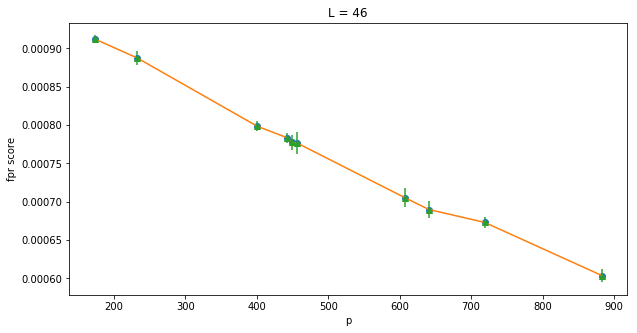

In [353]:
def my_plot(all_, xl, yl, tit):
    x = sorted(all_.keys())
    y = [all_[i][1] for i in sorted(all_)]
    e = [all_[i][0] for i in sorted(all_)]
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, 'o', label='mean')
    plt.plot(x, y)
    plt.errorbar(x, y, e, linestyle='None', marker='^')
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(tit)
    plt.show()

my_plot(all_, 'p', 'fpr score', 'L = ' + str(l))

Как видно на графике, с увеличением p наблюдается уменьшение кол-ва коллизий

Фиксируем рандомное значение p

In [359]:
p = random.choice(ps)
all_ = {}

res = []

for l in L:
    
    res = []
    n = 0
    arr = [rand_str(l) for _ in range(100000)]
    
    for i in range(10):
        ar = arr[n: n+1000]
        hashes = [double_hash(item, p) for item in ar]
        n_c = if_hash_ex(hashes)
        fpr = n_c * 2 / (1000 *  (1000 - 1))
        res.append(fpr)
        n += 1000

    all_[l] = (np.std(res), np.mean(res))

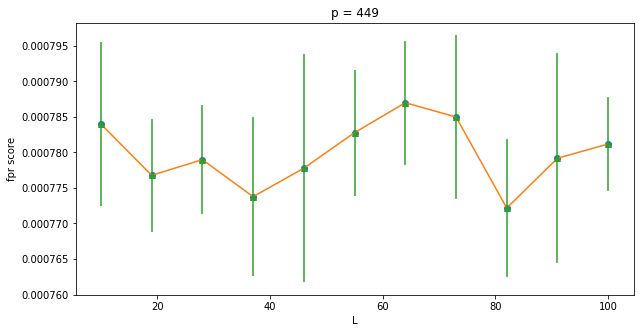

In [362]:
my_plot(all_, 'L', 'fpr score', 'p = ' + str(p))

С ростом L кол-во коллизий может варьироваться. 

Проведем эксперемент для всех значений

In [364]:
std_m = np.zeros((11, 10))
mean_m = np.zeros((11, 10))

In [365]:
arr = list(arr)
used = []
t_par = tqdm_notebook(ps, desc='p', leave=True)

for index, p in enumerate(t_par):
    
    for idx, l in enumerate(L):
        
        res = []
        n = 0
        arr = set()
        
        def arr_s(l, used):
            arr = [rand_str(l) for _ in range(10000)]
            arr = set(arr)
            b = arr & set(used)
            if len(b) != 0: arr -= b
            return arr
    
        while len(arr) < 10000:
            arr |= arr_s(l, used)
        
        arr = list(arr)
        used += arr
            
        for i in range(10):
            ar = arr[n: n+1000]
            hashes = [double_hash(item, p) for item in ar]
            n_c = if_hash_ex(hashes)
            fpr = n_c * 2 / (1000 *  (1000 - 1))
            res.append(fpr)
            n += 1000

        std_m[idx][index] = np.std(res)
        mean_m[idx][index] = np.mean(res)
        

In [366]:
def L_plot(L, mean_m, std_m):
    
    x = L
    y = [np.mean(mean_m[i]) for i in range(len(L))]
    e = [np.mean(std_m[i]) for i in range(len(L))]
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, 'o', label='mean')
    plt.plot(x, y)
    plt.errorbar(x, y, e, linestyle='None', marker='^')
    plt.xlabel("L")
    plt.ylabel("fpr score")
    plt.show()
    plt.show()

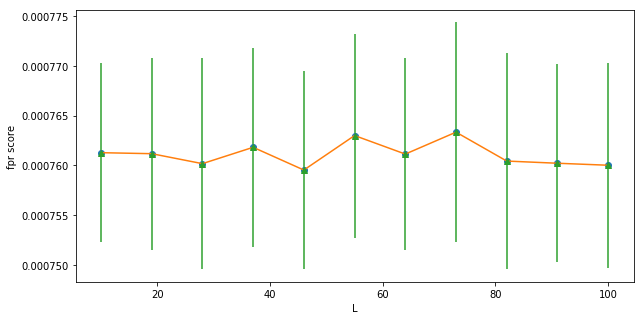

In [367]:
L_plot(L, mean_m, std_m)

На всех данных при росте L  кол-во коллизий также может варьироваться.

In [368]:
def p_plot(ps, mean_m, std_m):
    
    ps = sorted(ps)
    x = ps
    y = [np.mean(mean_m[:, i]) for i in range(len(ps))]
    e = [np.mean(std_m[:, i]) for i in range(len(ps))]
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, 'o')
    plt.plot(x, y)
    plt.errorbar(x, y, e, linestyle='None', marker='^')
    plt.xlabel("p")
    plt.ylabel("fpr score")
    plt.show()


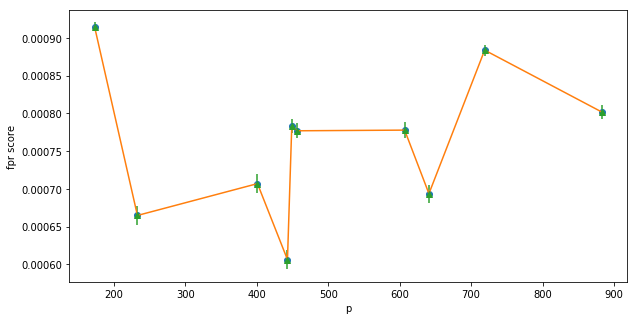

In [369]:
p_plot(ps, mean_m, std_m)

Возрастает или убывает по р тоже трудно сказать, результаты варьируются